# Import Libraries

In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import os
for dirname,_,filenames in os.walk("input"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\NF-ToN-IoT-V2.csv


# Data Loading

In [8]:
df = pd.read_csv("input/NF-ToN-IoT-v2.csv")

In [9]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
0,58580,7676,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
1,39772,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,64240,0,0,0,0,0,0,password
2,50712,53,17,0.0,72,1,97,1,0,0,0,4294857,0,0,0,0,97,72,72,97,72.0,97.0,0,0,0,0,576000,776000,2,0,0,0,0,0,0,0,0,64640,12,0,0,ddos
3,36670,1761,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
4,53104,53,17,0.0,72,1,72,1,0,0,0,0,0,0,0,0,72,72,72,72,72.0,72.0,0,0,0,0,576000,576000,2,0,0,0,0,0,0,0,0,65019,12,0,0,ddos


In [10]:
df.shape

(19106, 42)

# Data Preprocessing

In [5]:
for feature in df.columns.tolist():
    print('{:<30} -> {} null values'.format(feature, df[feature].isnull().sum()),'\n')

L4_SRC_PORT                    -> 0 null values 

L4_DST_PORT                    -> 0 null values 

PROTOCOL                       -> 0 null values 

L7_PROTO                       -> 0 null values 

IN_BYTES                       -> 0 null values 

IN_PKTS                        -> 0 null values 

OUT_BYTES                      -> 0 null values 

OUT_PKTS                       -> 0 null values 

TCP_FLAGS                      -> 0 null values 

CLIENT_TCP_FLAGS               -> 0 null values 

SERVER_TCP_FLAGS               -> 0 null values 

FLOW_DURATION_MILLISECONDS     -> 0 null values 

DURATION_IN                    -> 0 null values 

DURATION_OUT                   -> 0 null values 

MIN_TTL                        -> 0 null values 

MAX_TTL                        -> 0 null values 

LONGEST_FLOW_PKT               -> 0 null values 

SHORTEST_FLOW_PKT              -> 0 null values 

MIN_IP_PKT_LEN                 -> 0 null values 

MAX_IP_PKT_LEN                 -> 0 null values 



In [6]:
for feature in df.columns.tolist():
    print('{:<30} -> {} infinity values'.format(feature, df[feature].isin([np.inf, -np.inf]).sum()),'\n')

L4_SRC_PORT                    -> 0 infinity values 

L4_DST_PORT                    -> 0 infinity values 

PROTOCOL                       -> 0 infinity values 

L7_PROTO                       -> 0 infinity values 

IN_BYTES                       -> 0 infinity values 

IN_PKTS                        -> 0 infinity values 

OUT_BYTES                      -> 0 infinity values 

OUT_PKTS                       -> 0 infinity values 

TCP_FLAGS                      -> 0 infinity values 

CLIENT_TCP_FLAGS               -> 0 infinity values 

SERVER_TCP_FLAGS               -> 0 infinity values 

FLOW_DURATION_MILLISECONDS     -> 0 infinity values 

DURATION_IN                    -> 0 infinity values 

DURATION_OUT                   -> 0 infinity values 

MIN_TTL                        -> 0 infinity values 

MAX_TTL                        -> 0 infinity values 

LONGEST_FLOW_PKT               -> 0 infinity values 

SHORTEST_FLOW_PKT              -> 0 infinity values 

MIN_IP_PKT_LEN              

In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
0,58580,7676,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
1,39772,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,64240,0,0,0,0,0,0,password
2,50712,53,17,0.0,72,1,97,1,0,0,0,4294857,0,0,0,0,97,72,72,97,72.0,97.0,0,0,0,0,576000,776000,2,0,0,0,0,0,0,0,0,64640,12,0,0,ddos
3,36670,1761,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
4,53104,53,17,0.0,72,1,72,1,0,0,0,0,0,0,0,0,72,72,72,72,72.0,72.0,0,0,0,0,576000,576000,2,0,0,0,0,0,0,0,0,65019,12,0,0,ddos


In [9]:
df_cols=df.columns.tolist()
df_cols=[str(col).strip() for col in df_cols]
df.columns=df_cols
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
0,58580,7676,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
1,39772,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,64240,0,0,0,0,0,0,password
2,50712,53,17,0.0,72,1,97,1,0,0,0,4294857,0,0,0,0,97,72,72,97,72.0,97.0,0,0,0,0,576000,776000,2,0,0,0,0,0,0,0,0,64640,12,0,0,ddos
3,36670,1761,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,Benign
4,53104,53,17,0.0,72,1,72,1,0,0,0,0,0,0,0,0,72,72,72,72,72.0,72.0,0,0,0,0,576000,576000,2,0,0,0,0,0,0,0,0,65019,12,0,0,ddos


In [10]:
class_labels=df['Label'].unique().tolist()
class_labels.sort()
print(class_labels)

['Benign', 'ddos', 'password', 'scanning']


In [11]:
df['Label'].value_counts()

Benign      5007
scanning    5003
password    4998
ddos        4098
Name: Label, dtype: int64

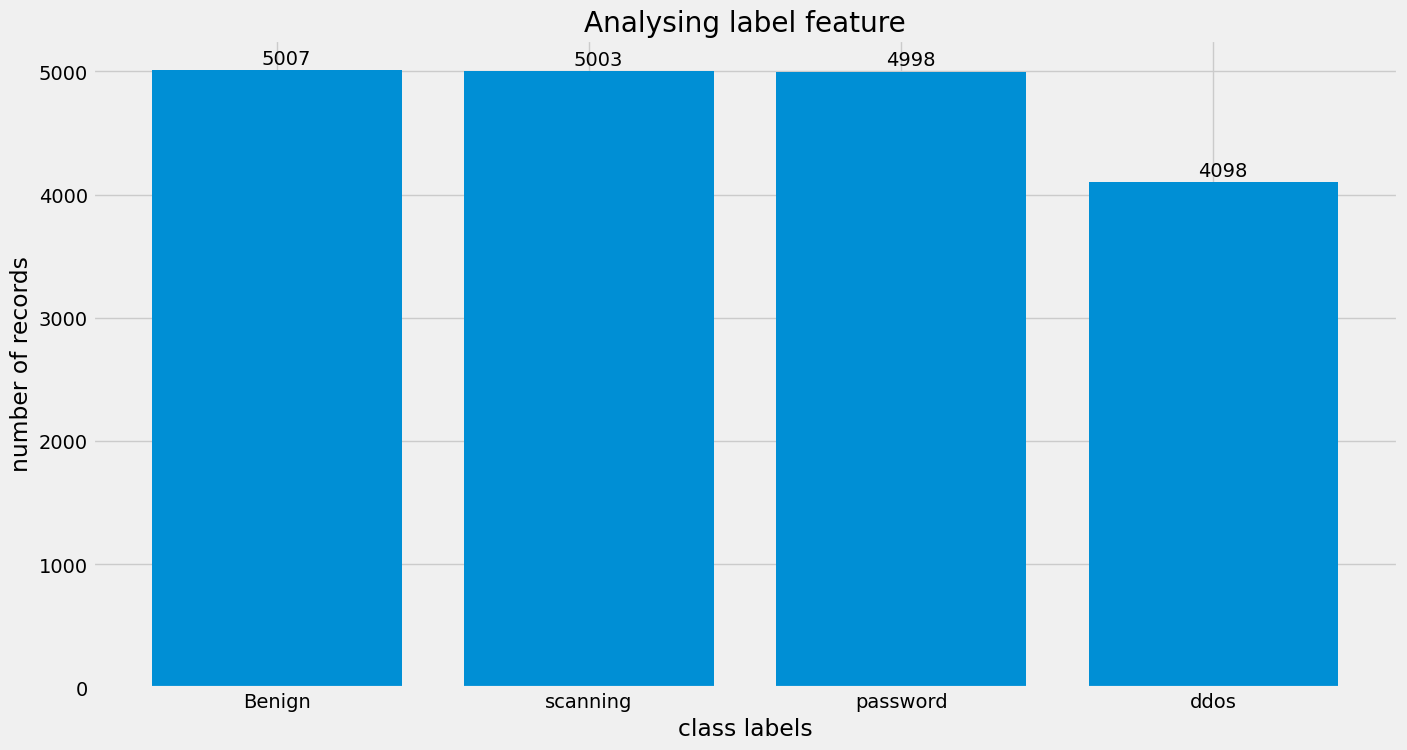

In [12]:
chart_data=list(dict(df['Label'].value_counts()).values())
chart_labels=list(dict(df['Label'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

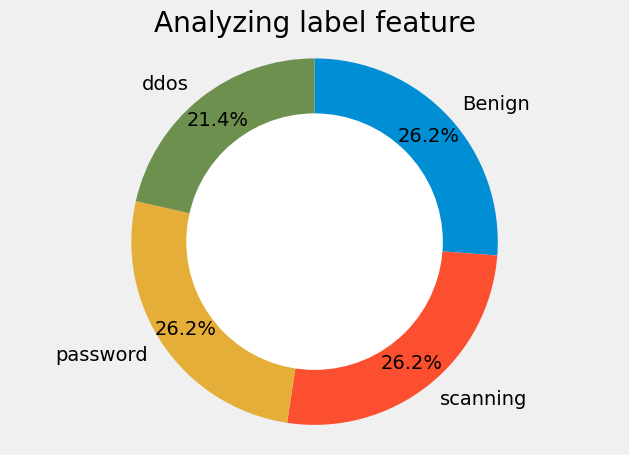

In [13]:
chart_data = list(dict(df['Label'].value_counts()).values())
chart_labels = list(dict(df['Label'].value_counts()).keys())
with plt.style.context(style='fivethirtyeight'):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    ax.pie(chart_data, labels=chart_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, counterclock=False, wedgeprops=dict(width=0.4))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')  
    ax.set_title(label='Analyzing label feature')
    plt.show()

***Label Encoding***

In [14]:
class_dict={}
for idx,label in enumerate(class_labels):
    class_dict[label]=idx
print(class_dict)

{'Benign': 0, 'ddos': 1, 'password': 2, 'scanning': 3}


In [15]:
df['class']=df['Label'].map(class_dict)
df = df.drop(labels='Label',axis=1)
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,SHORTEST_FLOW_PKT,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,SRC_TO_DST_SECOND_BYTES,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_IN_BYTES,RETRANSMITTED_IN_PKTS,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_UP_TO_128_BYTES,NUM_PKTS_128_TO_256_BYTES,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,class
0,58580,7676,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,0
1,39772,80,6,7.0,84,2,44,1,22,6,18,0,0,0,64,64,44,40,40,44,84.0,44.0,0,0,0,0,672000,352000,3,0,0,0,0,1024,64240,0,0,0,0,0,0,2
2,50712,53,17,0.0,72,1,97,1,0,0,0,4294857,0,0,0,0,97,72,72,97,72.0,97.0,0,0,0,0,576000,776000,2,0,0,0,0,0,0,0,0,64640,12,0,0,1
3,36670,1761,6,0.0,44,1,0,0,2,2,0,0,0,0,0,0,44,44,0,44,44.0,0.0,0,0,0,0,352000,0,1,0,0,0,0,1024,0,0,0,0,0,0,0,0
4,53104,53,17,0.0,72,1,72,1,0,0,0,0,0,0,0,0,72,72,72,72,72.0,72.0,0,0,0,0,576000,576000,2,0,0,0,0,0,0,0,0,65019,12,0,0,1


***Feature Selection***

In [16]:
target_feature = 'class'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])

In [17]:
data = pd.DataFrame(corr)
data = data.reset_index()
data.columns = ['features', 'importance']
data.head()

,features,importance
0,L4_SRC_PORT,-0.361688
1,L4_DST_PORT,0.341200
2,PROTOCOL,-0.174181
3,L7_PROTO,0.063405
4,IN_BYTES,-0.003243


In [18]:
data.shape

(41, 2)

In [19]:
data = data.loc[data['importance']>=0]
data.shape

(23, 2)

In [20]:
data["features"].values.tolist()

['L4_DST_PORT',
 'L7_PROTO',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'MIN_TTL',
 'MAX_TTL',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_256_TO_512_BYTES',
 'NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_1024_TO_1514_BYTES',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'FTP_COMMAND_RET_CODE']

In [21]:
filtered_df = df[[target_feature] + data["features"].values.tolist()]
filtered_df = filtered_df.sample(frac=1).reset_index(drop=True)
filtered_df.head()

,class,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
0,3,959,0.0,0,0,2,2,0,0,0,0,48,48,0.0,0,0,384000,0,0,0,0,4096,0,0
1,3,3742,0.0,0,0,2,2,0,0,0,0,48,48,0.0,0,0,384000,0,0,0,0,4096,0,0
2,2,80,7.0,44,1,22,6,18,0,64,64,44,44,44.0,0,0,672000,352000,0,0,0,1024,64240,0
3,1,80,7.0,475,3,30,30,26,4294904,64,64,485,485,475.0,0,0,80000,3800000,2,0,0,29200,28960,0
4,0,777,0.0,0,0,2,2,0,0,0,0,44,44,0.0,0,0,352000,0,0,0,0,1024,0,0


***Normalization***

In [22]:
scaler = MinMaxScaler()
scaler = scaler.fit(filtered_df.drop(labels='class',axis=1))
scaled_df=scaler.transform(filtered_df.drop(labels='class',axis=1))
data=pd.DataFrame(data=scaled_df,columns=filtered_df.drop(labels='class',axis=1).columns)
data['class']=filtered_df['class'].values
data.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE,class
0,0.014635,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.0,0.0,0.062501,0.000000,0.0,3
1,0.057105,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.0,0.0,0.062501,0.000000,0.0,3
2,0.001221,0.028689,0.000629,0.004831,0.709677,0.193548,0.580645,0.000000,0.25098,0.25098,0.010870,0.010870,0.000006,0.0,0.0,0.004495,0.001828,0.00000,0.0,0.0,0.015625,0.980240,0.0,2
3,0.001221,0.028689,0.006790,0.014493,0.967742,0.967742,0.838710,0.999986,0.25098,0.25098,0.310462,0.310462,0.000064,0.0,0.0,0.000535,0.019737,0.01626,0.0,0.0,0.445563,0.441901,0.0,1
4,0.011858,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.00000,0.0,0.0,0.015625,0.000000,0.0,0


In [23]:
with open(file='models/Scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

In [24]:
imp_cols = data.columns.tolist()
imp_cols

['L4_DST_PORT',
 'L7_PROTO',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'FLOW_DURATION_MILLISECONDS',
 'MIN_TTL',
 'MAX_TTL',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'DST_TO_SRC_SECOND_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'RETRANSMITTED_OUT_PKTS',
 'SRC_TO_DST_AVG_THROUGHPUT',
 'DST_TO_SRC_AVG_THROUGHPUT',
 'NUM_PKTS_256_TO_512_BYTES',
 'NUM_PKTS_512_TO_1024_BYTES',
 'NUM_PKTS_1024_TO_1514_BYTES',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MAX_OUT',
 'FTP_COMMAND_RET_CODE',
 'class']

In [25]:
imp_cols.remove('class')
with open(file='models/Important_Features.pkl',mode='wb') as file:
    pickle.dump(obj=imp_cols, file=file)

In [26]:
data = data.sample(frac=1).reset_index(drop=True)

X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [27]:
X.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
0,0.003388,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.00000,0.0,0.00,0.015625,0.000000,0.0
1,0.001221,0.028689,0.019041,0.014493,0.967742,0.967742,0.838710,0.000000,0.25098,0.25098,0.809783,0.809783,0.000181,0.0,0.0,0.030610,0.055348,0.00813,0.0,0.05,0.445563,0.441901,0.0
2,0.000809,0.000000,0.000772,0.004831,0.000000,0.000000,0.000000,0.999997,0.25098,0.25098,0.017663,0.017663,0.000007,0.0,0.0,0.000321,0.002244,0.00000,0.0,0.00,0.000000,0.000000,0.0
3,0.001221,0.028689,0.019269,0.019324,1.000000,0.967742,0.870968,0.000000,0.25098,0.25098,0.785326,0.785326,0.000183,0.0,0.0,0.015305,0.056013,0.00000,0.0,0.05,0.445563,0.441901,0.0
4,0.144259,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.000000,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.0,0.00,0.062501,0.000000,0.0


In [28]:
y.head()

,class
0,0
1,2
2,1
3,2
4,3


***Data Oversampling***

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X.values, y.values.ravel())

data=pd.DataFrame(data=X_smote,columns=X.columns)
data['class']=y_smote
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE,class
0,0.750458,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.0,0.000000,0.0,0.015625,0.00000,0.0,0
1,0.001221,0.028689,0.010607,0.019324,1.000000,0.967742,0.870968,0.0,0.25098,0.25098,0.373641,0.373641,0.000101,0.0,0.0,0.018141,0.030832,0.0,0.022727,0.0,0.445563,0.08838,0.0,1
2,0.017565,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.0,0.000000,0.0,0.015625,0.00000,0.0,0
3,0.015261,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.0,0.000000,0.0,0.062501,0.00000,0.0,3
4,0.015978,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.0,0.00000,0.00000,0.010870,0.010870,0.000005,0.0,0.0,0.002355,0.001662,0.0,0.000000,0.0,0.015625,0.00000,0.0,0


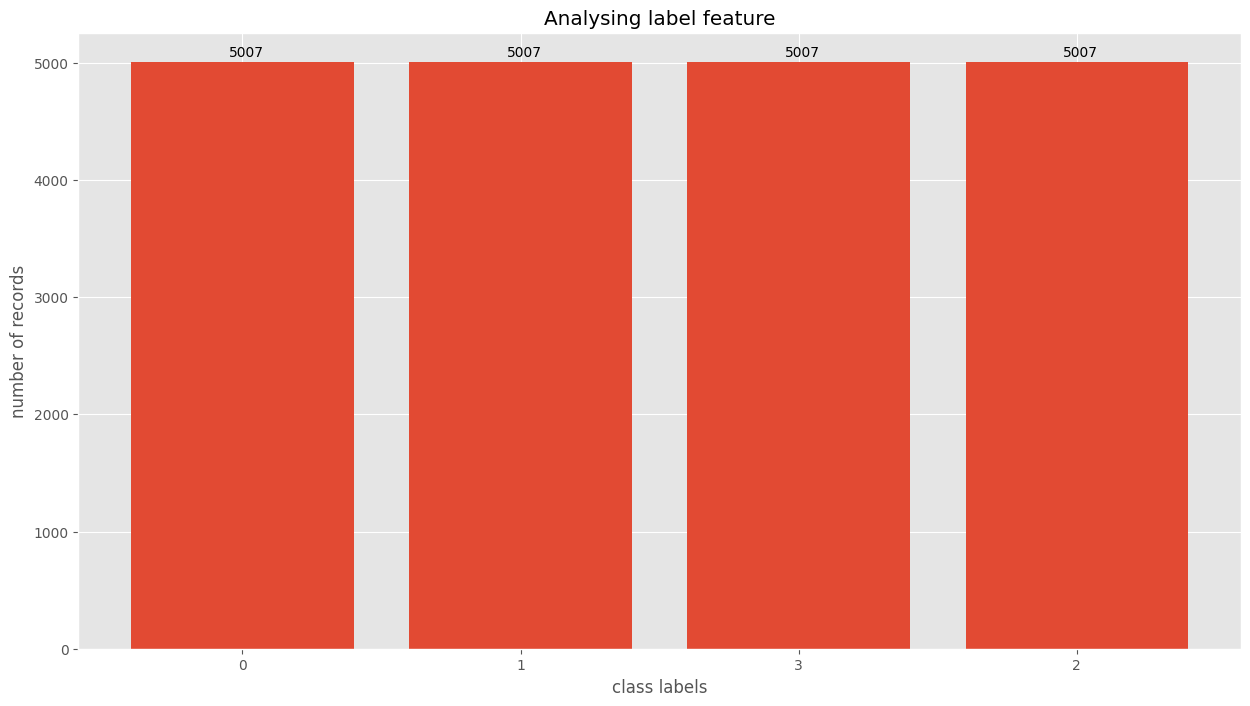

In [31]:
chart_data=list(dict(data['class'].value_counts()).values())
chart_labels=list(dict(data['class'].value_counts()).keys())
chart_labels=[str(item) for item in chart_labels]
with plt.style.context(style='ggplot'):
    fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,8))
    ax.bar(x=chart_labels,
           height=chart_data)
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+50))
    ax.set_title(label='Analysing label feature')
    ax.set_xlabel(xlabel='class labels')
    ax.set_ylabel(ylabel='number of records')
    plt.show()

In [32]:
data.shape

(20028, 24)

# Data Splitting

In [33]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [34]:
X.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
0,0.750458,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.0,0.000000,0.0,0.015625,0.00000,0.0
1,0.001221,0.028689,0.010607,0.019324,1.000000,0.967742,0.870968,0.0,0.25098,0.25098,0.373641,0.373641,0.000101,0.0,0.0,0.018141,0.030832,0.0,0.022727,0.0,0.445563,0.08838,0.0
2,0.017565,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.0,0.000000,0.0,0.015625,0.00000,0.0
3,0.015261,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.0,0.000000,0.0,0.062501,0.00000,0.0
4,0.015978,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.0,0.00000,0.00000,0.010870,0.010870,0.000005,0.0,0.0,0.002355,0.001662,0.0,0.000000,0.0,0.015625,0.00000,0.0


In [35]:
y.head()

,class
0,0
1,1
2,0
3,3
4,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16022, 23) (4006, 23) (16022, 1) (4006, 1)


In [37]:
X_train.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
14358,0.753876,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.00000,0.000000,0.0,0.015625,0.00000,0.0
336,0.001221,0.028689,0.000629,0.004831,0.709677,0.193548,0.580645,0.0,0.25098,0.25098,0.010870,0.010870,0.000006,0.0,0.0,0.004495,0.001828,0.00000,0.000000,0.0,0.015625,0.98024,0.0
9562,0.110045,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.000000,0.0,0.062501,0.00000,0.0
18189,0.001221,0.028689,0.009849,0.014493,0.967742,0.967742,0.838710,0.0,0.25098,0.25098,0.372962,0.372962,0.000093,0.0,0.0,0.031680,0.028630,0.00813,0.022727,0.0,0.445563,0.08838,0.0
5703,0.001221,0.028689,0.000629,0.004831,0.709677,0.193548,0.580645,0.0,0.25098,0.25098,0.010870,0.010870,0.000006,0.0,0.0,0.004495,0.001828,0.00000,0.000000,0.0,0.015625,0.98024,0.0


In [38]:
y_train.head()

,class
14358,0
336,2
9562,3
18189,1
5703,2


In [39]:
X_test.head()

,L4_DST_PORT,L7_PROTO,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,FLOW_DURATION_MILLISECONDS,MIN_TTL,MAX_TTL,LONGEST_FLOW_PKT,MAX_IP_PKT_LEN,DST_TO_SRC_SECOND_BYTES,RETRANSMITTED_OUT_BYTES,RETRANSMITTED_OUT_PKTS,SRC_TO_DST_AVG_THROUGHPUT,DST_TO_SRC_AVG_THROUGHPUT,NUM_PKTS_256_TO_512_BYTES,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,FTP_COMMAND_RET_CODE
2892,0.001221,0.028689,0.020713,0.019324,0.967742,0.967742,0.838710,0.0,0.25098,0.25098,0.400815,0.400815,0.000196,0.0,0.0,0.033125,0.060209,0.02439,0.022727,0.0,0.445563,1.0,0.0
17228,0.173010,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.000000,0.0,0.062501,0.0,0.0
8818,0.061104,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.010870,0.010870,0.000000,0.0,0.0,0.002355,0.000000,0.00000,0.000000,0.0,0.015625,0.0,0.0
2401,0.589290,0.000000,0.000000,0.000000,0.064516,0.064516,0.000000,0.0,0.00000,0.00000,0.013587,0.013587,0.000000,0.0,0.0,0.002569,0.000000,0.00000,0.000000,0.0,0.062501,0.0,0.0
929,0.765169,0.000000,0.000572,0.004831,0.709677,0.064516,0.645161,0.0,0.00000,0.00000,0.013587,0.013587,0.000005,0.0,0.0,0.002569,0.001662,0.00000,0.000000,0.0,0.062501,0.0,0.0


In [40]:
y_test.head()

,class
2892,2
17228,3
8818,0
2401,3
929,3


In [81]:
X_train.to_csv("splitted_data/X_train.csv", index=False)
X_test.to_csv("splitted_data/X_test.csv", index=False)
y_train.to_csv("splitted_data/y_train.csv", index=False)
y_test.to_csv("splitted_data/y_test.csv", index=False)

---

In [84]:
data['class_labels'].value_counts()  # Replace 'class_label' with your actual column name for attack labels

KeyError: 'class_labels'

In [85]:
print(data.columns)


Index(['L4_DST_PORT', 'L7_PROTO', 'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS',
       'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS',
       'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT', 'MAX_IP_PKT_LEN',
       'DST_TO_SRC_SECOND_BYTES', 'RETRANSMITTED_OUT_BYTES',
       'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT',
       'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_256_TO_512_BYTES',
       'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'FTP_COMMAND_RET_CODE', 'class'],
      dtype='object')
